# Unsupervised Learning - K-Means Clustering Example 
    ## Only provide x-input 
    ## Common terms: 
    ## 1. Cluster - partition our dataset into K distinct (different) cluster 
    ## 2. Centroid - nearest mean cluster

In [18]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
X = np.array([
    [7.5, 8.0],
    [9.0, 7.0],
    [10.5, 6.5],
    [6.0, 9.0],
    [13.0, 5.5],
    [8.0, 8.5],
    [14.0, 4.5],
    [9.5, 7.0],
    [7.0, 9.0],
    [12.0, 6.0]
])

df = pd.DataFrame(X, columns=['EntryTime', 'Duration'])
df

,EntryTime,Duration
0,7.5,8.0
1,9.0,7.0
2,10.5,6.5
3,6.0,9.0
4,13.0,5.5
5,8.0,8.5
6,14.0,4.5
7,9.5,7.0
8,7.0,9.0
9,12.0,6.0


In [4]:
#Create the model 
model = KMeans(n_clusters=3, random_state=0)
#clusters - user assigned -- usually odd numbers


In [5]:
df['Clusters']= model.fit_predict(df[['EntryTime','Duration']])
centers = model.cluster_centers_
df

,EntryTime,Duration,Clusters
0,7.5,8.0,0
1,9.0,7.0,2
2,10.5,6.5,2
3,6.0,9.0,0
4,13.0,5.5,1
5,8.0,8.5,0
6,14.0,4.5,1
7,9.5,7.0,2
8,7.0,9.0,0
9,12.0,6.0,1


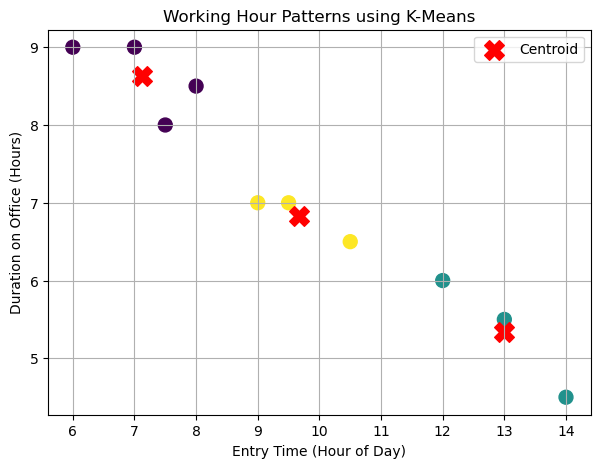

In [13]:
plt.figure(figsize=(7,5))
plt.scatter(df['EntryTime'], df['Duration'], c=df['Clusters'], s=100)
plt.scatter(centers[:,0], centers[:,1], marker='X', s=200, c='red', label='Centroid')
#centers -- 
plt.xlabel('Entry Time (Hour of Day)')
plt.ylabel('Duration on Office (Hours)')
plt.title('Working Hour Patterns using K-Means')
plt.legend()
plt.grid(True)
plt.show()

# Lab: Customer Segmentation using K-Means
    ## Goal: Group customers by Annual Income and Spending Score.
    ## Download customer.csv from https://github.com/salman1256/aimltraining/tree/main/Day-17(II)
    ## Load data from customers.csv
    ## Visualize the data
    ## Cluster
    ## Interpret each segment like 'High income / high spender' etc.
    ## Create Scatter plot for the same

In [16]:
df = pd.read_csv("customers.csv")
df.head()

,CustomerID,AnnualIncome,SpendingScore
0,1,15,79
1,2,16,81
2,3,17,76
3,4,18,75
4,5,19,73


In [22]:
model = KMeans(n_clusters=3, random_state=0)
df['SpendingPower']=model.fit_predict(df[['AnnualIncome','SpendingScore']])

In [23]:
centers=model.cluster_centers_
df

,CustomerID,AnnualIncome,SpendingScore,SpendingPower
0,1,15,79,2
1,2,16,81,2
2,3,17,76,2
3,4,18,75,2
4,5,19,73,2
5,6,20,72,2
6,7,25,40,0
7,8,28,42,0
8,9,30,39,0
9,10,33,35,0


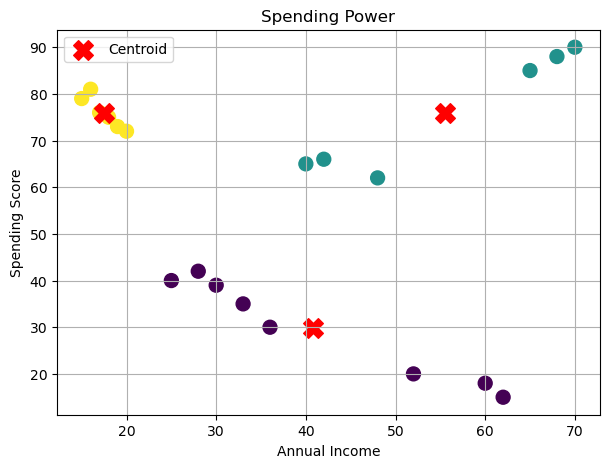

In [24]:
plt.figure(figsize=(7,5))
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c=df['SpendingPower'], s=100)
plt.scatter(centers[:,0], centers[:,1], marker='X', s=200, c='red', label='Centroid')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Spending Power')
plt.legend()
plt.grid(True)
plt.show()